# Chap 4: TP Python : Redressemment d'images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Création des matrices utilisées

### Exo 4.1:

In [2]:
def point_vecteur(p):
    return((p[0],p[1],1))

In [3]:
vecteur = (2,5)
point_vecteur(vecteur)

(2, 5, 1)

In [4]:
vecteur2 = (3,8)
point_vecteur(vecteur2)

(3, 8, 1)

### Exo 4.2 :

In [13]:
def repere_projectif(p_1,p_2,p_3,p_4):
    v1 = point_vecteur(p_1)
    v2 = point_vecteur(p_2)
    v3 = point_vecteur(p_3)
    v4 = point_vecteur(p_4)

    matrix1 = np.array([v1, v2, v3])
    det1 = np.linalg.det(matrix1)
    
    matrix2 = np.array([v1, v2, v4])
    det2 = np.linalg.det(matrix2)
    
    matrix3 = np.array([v2, v3, v4])
    det3 = np.linalg.det(matrix3)
    
    matrix4 = np.array([v1, v3, v4])
    det4 = np.linalg.det(matrix4)
    
    if (det1 !=0 and det2 !=0 and det3 !=0 and det4 !=0 ):
        return (True)
    else:
        return(False)
    

In [6]:
#modification de la fonction pour avoir directement des vecteurs avec 3 coordonnées 
#test avec les valeurs des exercices 2.5 et 2.6 du chapitre 2
def repere_projectif(v1,v2,v3,v4):


    matrix1 = np.array([v1, v2, v3])
    det1 = np.linalg.det(matrix1)
    print(det1)
    matrix2 = np.array([v1, v2, v4])
    det2 = np.linalg.det(matrix2)
    print(det2)
    matrix3 = np.array([v2, v3, v4])
    det3 = np.linalg.det(matrix3)
    print(det3)
    matrix4 = np.array([v1, v3, v4])
    det4 = np.linalg.det(matrix4)
    print(det4)
    if (det1 !=0 and det2 !=0 and det3 !=0 and det4 !=0 ):
        return (True)
    else:
        return(False)
    

In [7]:
repere_projectif((1,0,0),(1,1,0),(1,1,1),(3,2,1))

1.0
1.0
1.0000000000000002
-1.0


True

In [8]:
repere_projectif((0,1,1),(1,0,1),(1,1,0),(1,0,0))

2.0
1.0
-1.0
-1.0


True

In [9]:
repere_projectif((0,0,1),(1,0,1),(2,0,0),(1,1,0))

0.0
1.0
2.0
2.0


False

### Exo 4.3:

In [14]:
def matrice_A(p_1,p_2,p_3,p_4):
    v1 = point_vecteur(p_1)
    v2 = point_vecteur(p_2)
    v3 = point_vecteur(p_3)
    matrice = np.array([v1, v2, v3])
    #on transpose la matrice pour voir les vecteurs en colonnes
    transposee = np.transpose(matrice)
    return transposee

In [15]:
matrice_A((1,1),(2,0),(0,1),(1,2))

array([[1, 2, 0],
       [1, 0, 1],
       [1, 1, 1]])

In [16]:
#données de l'exo 2.7 du chap 2
matrice_A((0,0),(1,0),(0,1),(1,1))

array([[0, 1, 0],
       [0, 0, 1],
       [1, 1, 1]])

### Exo 4.4 :

In [17]:
def matrice_B(p_1,p_2,p_3,p_4):
    B = np.linalg.inv(matrice_A(p_1,p_2,p_3,p_4))
    return B

In [18]:
matrice_B((1,1),(2,0),(0,1),(1,2))

array([[ 1.,  2., -2.],
       [-0., -1.,  1.],
       [-1., -1.,  2.]])

In [19]:
#Données de l'exo 2.7 du chap 2
matrice_B((0,0),(1,0),(0,1),(1,1))

array([[-1., -1.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

### Exo 4.5:

In [20]:
def matrice_C(p_1,p_2,p_3,p_4):
    matriceA = matrice_A(p_1,p_2,p_3,p_4)
    #print (matriceA)
    matriceB = matrice_B(p_1,p_2,p_3,p_4)
    #print(matriceB)
    vecteur4 =np.array(point_vecteur(p_4))
    #print(vecteur4)
    matriceY = np.dot(matriceB,vecteur4)
    #print(matriceY)
    matDiagonaleY = np.diagflat(matriceY)
    #print(matDiagonaleY)
    matriceC = np.dot(matriceA, matDiagonaleY)
    return (matriceC)
    

In [21]:
#Données exo 2.7 du chap 2
matrice_C((0,0),(1,0),(0,1),(1,1))

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [-1.,  1.,  1.]])

### Exo 4.6: 

In [22]:
def matrice_passage(p_1,p_2,p_3,p_4,pp1,pp2,pp3,pp4):
    
    quadruplet1 = repere_projectif(p_1,p_2,p_3,p_4)
    quadruplet2 = repere_projectif(pp1,pp2,pp3,pp4)
    if not (quadruplet1 and quadruplet2):
        raise ValueError("Message d'erreur: Les deux quadruplets doivent chacun former un repère projectif")
    else :
        matriceC = matrice_C(p_1,p_2,p_3,p_4)
        #print(matriceC)
        inverse_C = np.linalg.inv(matriceC)
        #print(inverse_C)
        matriceCp = matrice_C(pp1,pp2,pp3,pp4)
        #print(matriceCp)
        matriceP = np.dot(matriceCp, inverse_C)
    return matriceP

In [23]:
#Données exo 2.7 chap 2
matrice_passage((0,0),(1,0),(0,1),(1,1),(0,0),(3,1),(2,1),(5,3/2))

array([[ 6. , -1. ,  0. ],
       [ 2. , -0.5,  0. ],
       [ 1.5, -1. ,  0.5]])

In [24]:
matrice_passage((0,0),(1,0),(2,0),(1,1),(0,0),(3,1),(2,1),(5,3/2))

ValueError: Message d'erreur: Les deux quadruplets doivent chacun former un repère projectif

### Exo 4.7 :


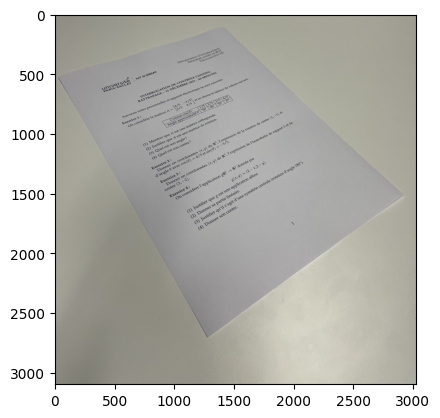

In [30]:
image = plt.imread("Z:/S5/visualisation3D/TP chap 4/ds.jpg")
plt.imshow(image)

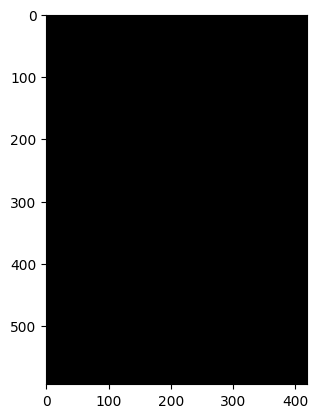

In [31]:
nouvelle_image = np.zeros((594,420,3), dtype = np.uint8)
plt.imshow(nouvelle_image)

Les coordonnées des quatres coins de l'image sont (0,0), (0,594),(420,0),(420,594)

In [32]:
def rectification_projective_A4(p_1,p_2,p_3,p_4,image):
    nouvelle_image = np.zeros((594,420,3), dtype = np.uint8)
    ligne, colonne = nouvelle_image.shape[:2]
    matriceP = matrice_passage(p_1,p_2,p_3,p_4,(0,0),(0,594),(420,0),(420,594))
    inverseMatriceP = np.linalg.inv(matriceP) 
    for i in range (ligne):
        for j in range(colonne):
            point = np.dot(inverseMatriceP, (j,i,1))
            a = round (point[0]/point[2])
            b = round (point[1]/point[2])
            nouvelle_image[i][j] = image[a][b]
    return nouvelle_image     

In [33]:
imageNew = rectification_projective_A4((539,37),(2718,1285),(120,1428),(1520,2919),image)

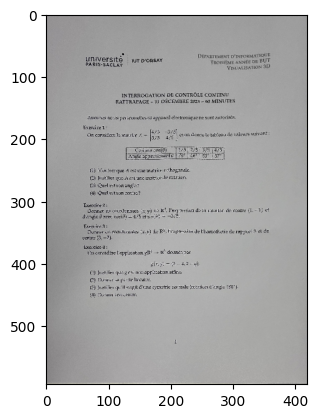

In [34]:
plt.imshow(imageNew)

### Exo 4.8:

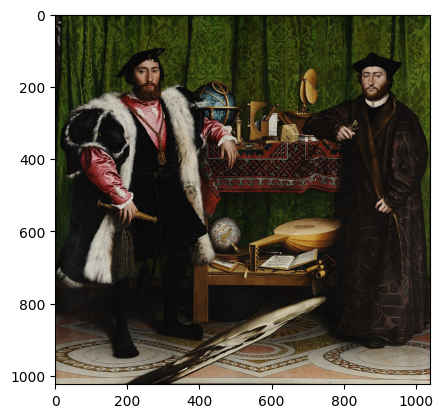

In [35]:
image2 = plt.imread("Z:/S5/visualisation3D/TP chap 4/ambassadeurs.jpg")
plt.imshow(image2)

In [36]:
def rectification_projective_A4_2(p_1,p_2,p_3,p_4,image):
    nouvelle_image = np.zeros((1420,350,3), dtype = np.uint8)
    ligne, colonne = nouvelle_image.shape[:2]
    matriceP = matrice_passage(p_1,p_2,p_3,p_4,(0,0),(0,1420),(350,0),(350,1420))
    inverseMatriceP = np.linalg.inv(matriceP) 
    for i in range (ligne):
        for j in range(colonne):
            point = np.dot(inverseMatriceP, (j,i,1))
            a = round (point[0]/point[2])
            b = round (point[1]/point[2])
            if 0 <= a <image.shape[0] and 1 <= b <image.shape[1]:
                nouvelle_image[i][j] = image[a][b]
    return nouvelle_image     

In [37]:
imageNew2 = rectification_projective_A4_2((5,5),(947,77),(1413,342),(469,268),image2)

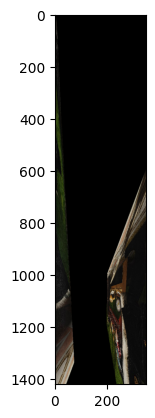

In [38]:
plt.imshow(imageNew2)

### Exo 4.9

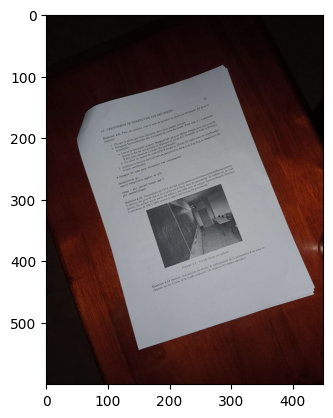

In [39]:
#%matplotlib qt
image3 = plt.imread("Z:/S5/visualisation3D/TP chap 4/TP.jpg")
plt.imshow(image3)

In [50]:
def rectification_projective_A4_3(p_1,p_2,p_3,p_4,image):
    nouvelle_image = np.zeros((600,450,3), dtype = np.uint8)
    ligne, colonne = nouvelle_image.shape[:2]
    matriceP = matrice_passage(p_1,p_2,p_3,p_4,(0,0),(0,600),(450,0),(450,600))
    inverseMatriceP = np.linalg.inv(matriceP) 
    for i in range (ligne):
        for j in range(colonne):
            point = np.dot(inverseMatriceP, (j,i,1))
            a = round (point[0]/point[2])
            b = round (point[1]/point[2])
            if 0 <= a <image.shape[0] and 1 <= b <image.shape[1]:
                nouvelle_image[i][j] = image[a][b]
    return nouvelle_image  

In [83]:
imageNew3 = rectification_projective_A4_3((180,80),(500,180),(125,260),(425,380),image3)

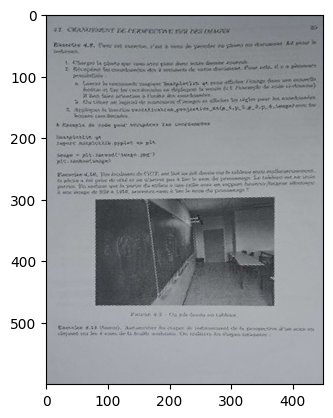

In [84]:
plt.imshow(imageNew3)

### Exo 4.10

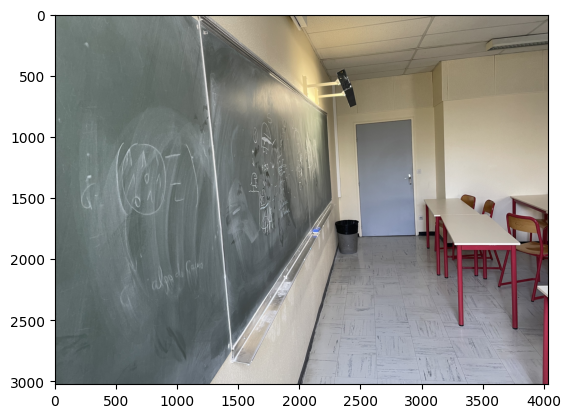

In [86]:
image4 = plt.imread("Z:/S5/visualisation3D/TP chap 4/tableau.jpg")
plt.imshow(image4)

In [100]:
def rectification_projective_A4_4(p_1,p_2,p_3,p_4,image):
    nouvelle_image = np.zeros((850,1450,3), dtype = np.uint8)
    ligne, colonne = nouvelle_image.shape[:2]
    matriceP = matrice_passage(p_1,p_2,p_3,p_4,(0,0),(0,850),(1450,0),(1450,850))
    inverseMatriceP = np.linalg.inv(matriceP) 
    for i in range (ligne):
        for j in range(colonne):
            point = np.dot(inverseMatriceP, (j,i,1))
            a = round (point[0]/point[2])
            b = round (point[1]/point[2])
            if 0 <= a <image.shape[0] and 1 <= b <image.shape[1]:
                nouvelle_image[i][j] = image[a][b]
    return nouvelle_image  

In [125]:
imageNew4 = rectification_projective_A4_4((100,1200),(2740,1450),(830,2220),(1500,2270),image4)

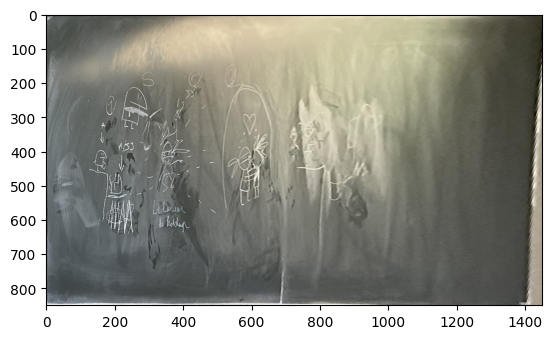

In [126]:
plt.imshow(imageNew4)